Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5000, 32)          5120      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5000, 80)          7760      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2500, 80)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2500, 54)          13014     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2500, 54)          8802      
_________________________________________________________________
flatten_1 (Flatten)          (None, 135000)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 135000)           

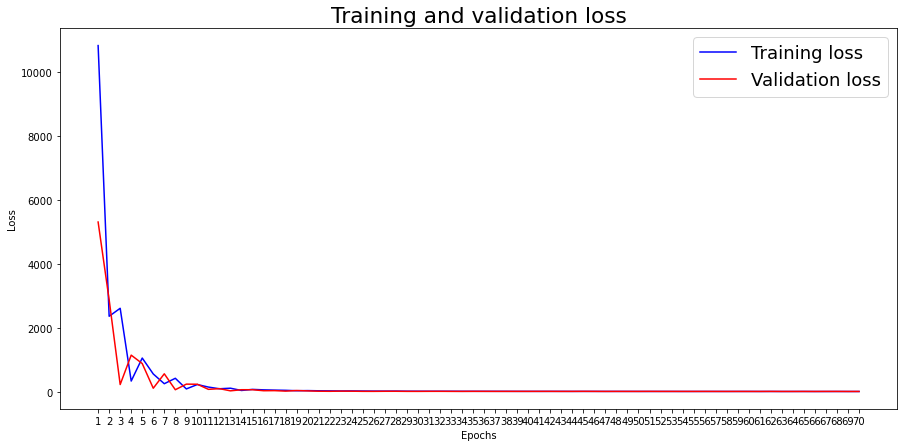

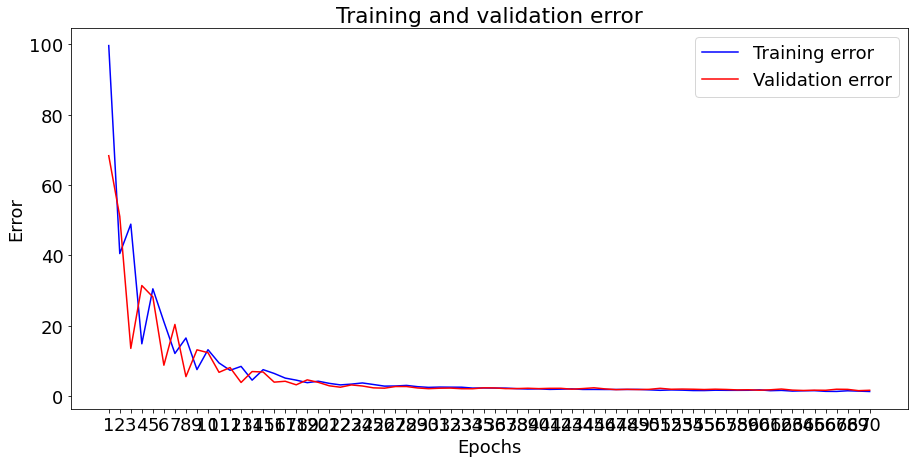

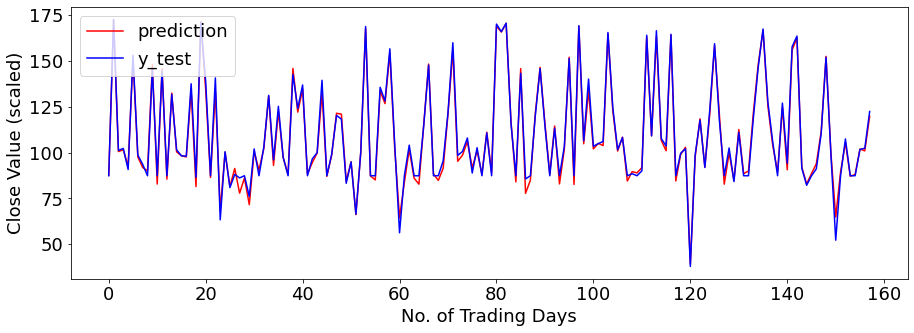

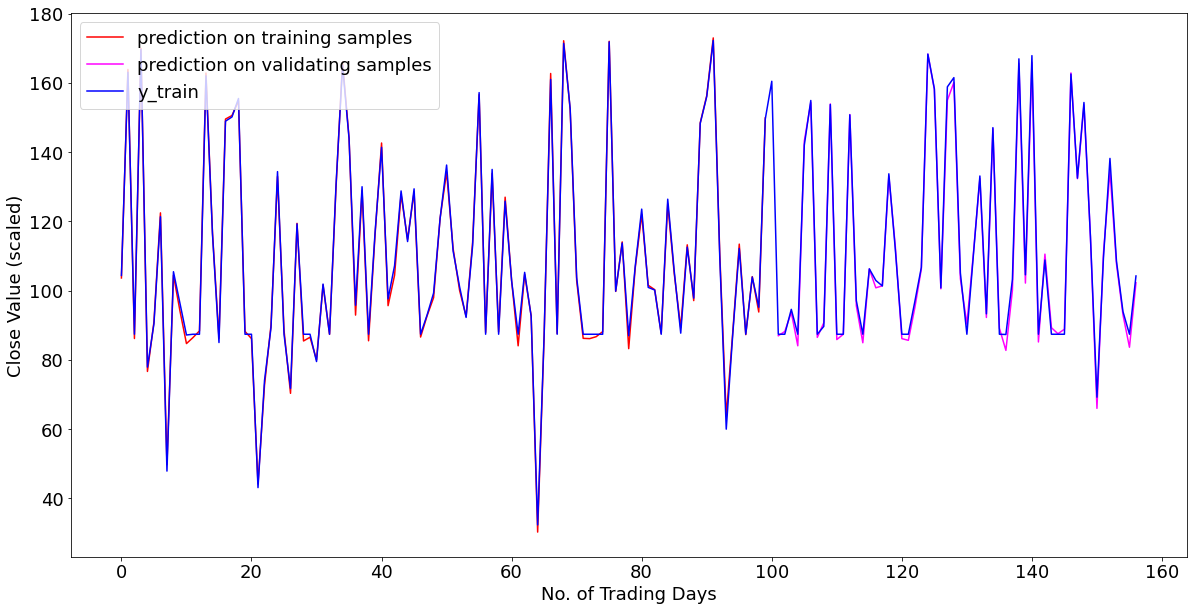

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
1.449651123 		 1.117174506 		 2.675459855 		 1.932954073
mean absolute error 	 mean absolute percentage error
 1.932953780 			 2.010518470


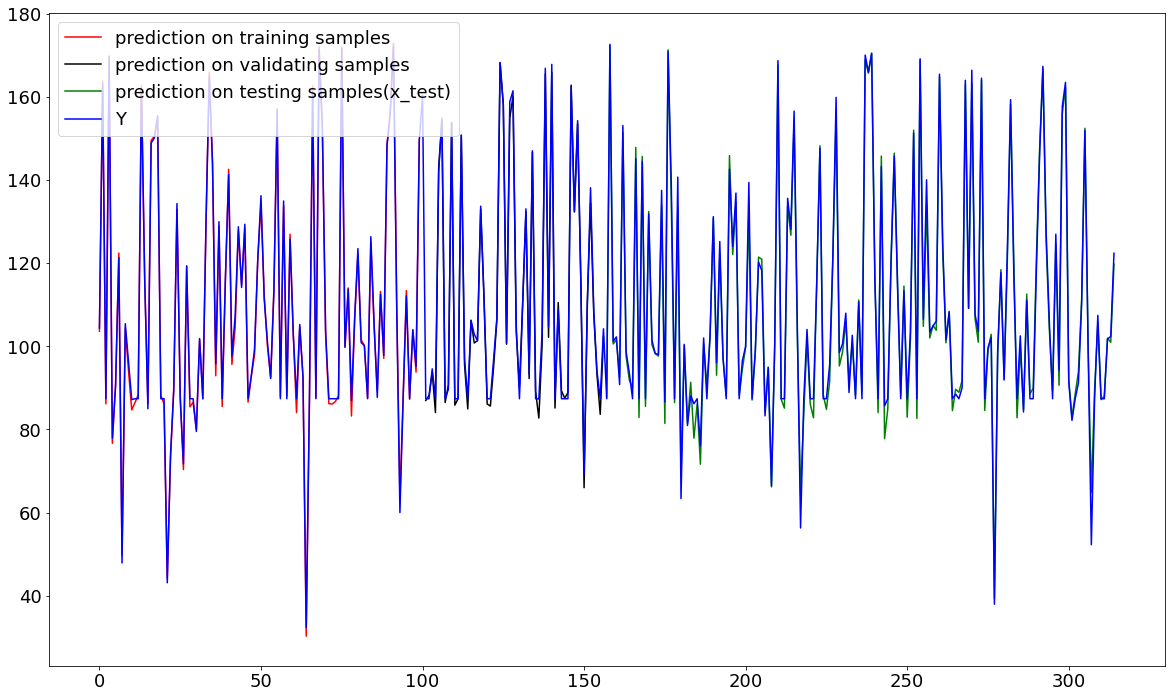

In [1]:
from __future__ import print_function
import glob
import time
import csv
import numpy as np
import pandas as pd

csvx_list = glob.glob('E:\资料\Dataset\PHM 2010\PHM 2010\c1\c1\*.csv')
A = []
for i in range(len(csvx_list)):
    # print(csvx_list[1])
    # filename='csvx_list[i]'
    filename = csvx_list[i]
    with open(filename, 'r') as f:
        row = csv.reader(f)
        a = []

        j = 0
        for r in row:
            j += 1

            if j > 5000 * 20:
                break

            if not j % 20:
                a.append([float(i) for i in r])
                # np.array(A)

    A.append(a)

A = np.array(A)
# A = A.reshape(A.shape[0], A.shape[-1], -1)

pass

import numpy as np

import pandas as pd

from keras.models import Sequential

from keras.utils import np_utils, plot_model

from sklearn.model_selection import cross_val_score, train_test_split

from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D

from keras.models import model_from_json

import matplotlib.pyplot as plt

from keras import backend as K
from keras.layers.recurrent import LSTM

# 载入数据

df = pd.read_csv(r"E:\资料\Dataset\PHM 2010\PHM 2010\c1\c1_wear.csv")

# X = np.expand_dims(A, axis=2)#增加一维轴
X = A

Y = df.values[:, 1]

# 划分训练集，测试集

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

import math
# importing keras modules
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.layers.recurrent import LSTM
from keras import losses
from keras import optimizers


def build_model(input):
    model = Sequential()
    model.add(LSTM(32, input_shape=(input[0], input[1]), return_sequences=True))
    # model.add(LSTM(128, input_shape=(input[0], input[1]), return_sequences=False))
    model.add(Conv1D(filters=80, kernel_size=3, padding='same', activation='relu', kernel_initializer="glorot_uniform"))
    model.add(MaxPooling1D(pool_size=2, padding='valid'))
    model.add(Conv1D(filters=54, kernel_size=3, padding='same', activation='relu', kernel_initializer="glorot_uniform"))
    model.add(Conv1D(filters=54, kernel_size=3, padding='same', activation='relu', kernel_initializer="glorot_uniform"))
    # model.add(MaxPooling1D(pool_size=2, padding='valid'))
    # model.add(LSTM(32,return_sequences=True))
    # model.add(LSTM(32,return_sequences=False))
    # model.add(Dropout(0.2))
    # model.add(Dense(32, activation="relu", kernel_initializer="uniform"))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model


# In[12]:


model = build_model([5000, 7, 1])
# Summary of the Model
print(model.summary())

# In[13]:


from timeit import default_timer as timer

start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=50,
                    epochs=70,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

# In[14]:


history_dict = history.history
history_dict.keys()

# In[15]:


# 画出训练集和验证集的损失曲线

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b', color='blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b', color='red', label='Validation loss')
plt.rc('font', size=18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15, 7)
# fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()

# In[16]:


# 画出训练集和验证集的误差图像

mae = history_dict['mae']
vmae = history_dict['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b', color='blue', label='Training error')
plt.plot(epochs, vmae, 'b', color='red', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15, 7)
# fig.savefig('img/tcstest&validationerrorcnn.png', dpi=300)
plt.show()

# In[17]:


model.metrics_names

# In[18]:


trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

# In[19]:


# predicting values for y_test
p = model.predict(x_test)
p = p.reshape(158)

# In[20]:


plt.plot(p, color='red', label='prediction')
plt.plot(y_test, color='blue', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
# fig.savefig('img/tcstestcnn.png', dpi=300)
plt.show()

# In[21]:


p1 = model.predict(x_train)
p1 = p1.reshape(157)

# In[22]:


plt.plot(p1[:100], color='red', label='prediction on training samples')
x = np.array(range(101, 157))
plt.plot(x, p1[101:], color='magenta', label='prediction on validating samples')
plt.plot(y_train, color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20, 10)
# fig.savefig('img/tcstraincnn.png', dpi=300)
plt.show()

# In[23]:


y = y_test  
y_pred = p.reshape(158)  # 测试集数据大小为265
# y_pred = y_pred * 10000   # 原始数据经过除以10000进行缩放，因此乘以10000,返回到原始数据规模


# In[24]:


from sklearn.metrics import mean_absolute_error

# In[25]:


print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (
    math.sqrt(trainScore[0]), trainScore[1], math.sqrt(testScore[0]), testScore[1]))

# In[26]:


print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y, y_pred), (np.mean(np.abs((y - y_pred) / y)) * 100)))

# In[27]:


Y = np.concatenate((y_train, y_test), axis=0)
P = np.concatenate((p1, p), axis=0)
# plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
# for
plt.plot(P[:100], color='red', label='prediction on training samples')
# for validating samples
z = np.array(range(101, 157))
plt.plot(z, P[101:157], color='black', label='prediction on validating samples')
# for testing samples
x = np.array(range(157, 315))
plt.plot(x, P[157:], color='green', label='prediction on testing samples(x_test)')

plt.plot(Y, color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.show()


In [4]:
p

array([ 87.72227 , 172.37018 , 100.5753  , 101.55008 ,  92.58667 ,
       151.50542 ,  97.61621 ,  91.908646,  90.00839 , 147.88994 ,
        82.88067 , 145.70984 ,  85.54739 , 132.45338 , 100.42924 ,
        98.28734 ,  97.65001 , 133.88092 ,  81.45834 , 171.36916 ,
       134.44096 ,  86.468575, 133.47838 ,  68.34924 , 100.23806 ,
        81.51692 ,  91.34354 ,  77.8885  ,  86.12174 ,  71.62452 ,
       100.55825 ,  90.47634 , 102.29012 , 130.79747 ,  93.03868 ,
       122.43623 ,  97.16191 ,  88.039696, 145.90222 , 122.09903 ,
       134.73172 ,  88.374725,  94.57919 ,  99.78647 , 132.5247  ,
        87.078575,  98.60419 , 121.480415, 120.97662 ,  84.34328 ,
        95.01933 ,  66.17308 , 100.24496 , 167.74248 ,  87.2746  ,
        85.12154 , 133.8231  , 126.73318 , 154.42435 , 102.53429 ,
        64.41868 ,  83.86915 , 101.75967 ,  86.085434,  82.80085 ,
       115.84625 , 148.29031 ,  88.42463 ,  84.83978 ,  91.44272 ,
       121.16148 , 155.82251 ,  95.27158 ,  98.645706, 106.046

In [5]:
y_test

array([ 87.39090058, 172.6868372 , 101.208521  , 102.2706475 ,
        90.79169571, 153.1603172 ,  98.69662026,  93.61810111,
        87.39090058, 145.1884767 ,  87.39090058, 144.556624  ,
        87.39090058, 131.8532309 , 101.4825683 ,  98.27500469,
        98.05482567, 137.540114  ,  86.61893145, 170.9810419 ,
       138.8181847 ,  87.39090058, 140.7367569 ,  63.3512879 ,
       100.4761675 ,  80.93427925,  88.0993478 ,  86.19210327,
        87.39090058,  76.06162381, 102.0112017 ,  87.39090058,
       103.0590149 , 131.2326523 ,  96.05429047, 125.2372354 ,
        97.35528535,  87.39090058, 142.6515699 , 124.0956175 ,
       136.902076  ,  87.39090058,  96.59529149,  99.99328397,
       139.4577462 ,  87.39090058,  99.09427345, 120.2912763 ,
       118.2674771 ,  83.27153045,  94.88972237,  66.4253909 ,
       100.3193584 , 168.7754925 ,  87.39090058,  87.39090058,
       135.6291837 , 128.1814351 , 156.6281987 , 104.7209733 ,
        56.28276562,  87.39090058, 104.0666829 ,  87.39

In [9]:
# Y = pd.DataFrame(Y)
Y

,0
0,104.385060
1,163.051616
2,87.390901
3,169.668654
4,77.885680
...,...
310,87.390901
311,87.390901
312,101.749324
313,102.400228


In [7]:
df

,cut,flute_1,flute_2,flute_3
0,1,32.317114,48.892617,37.720825
1,2,37.914879,49.570815,37.720825
2,3,43.087910,50.302867,37.720825
3,4,47.859072,51.083652,37.849851
4,5,52.250329,51.908288,38.172665
...,...,...,...,...
310,311,170.981042,161.824508,155.546719
311,312,171.411853,162.517989,156.189184
312,313,171.839631,163.218075,156.844309
313,314,172.264561,163.924726,157.512083


In [10]:
Y = df.values[:, 1]
Y

array([ 32.31711361,  37.914879  ,  43.08790971,  47.8590723 ,
        52.25032922,  56.28276562,  59.97661561,  63.3512879 ,
        66.4253909 ,  69.21675719,  71.74246752,  74.01887416,
        76.06162381,  77.88567991,  79.50534445,  80.93427925,
        82.18552678,  83.27153045,  84.20415441,  84.99470288,
        85.653939  ,  86.19210327,  86.61893145,  86.94367205,
        87.17510345,  87.32155046,  87.39090058,  87.39090058,
        87.39090058,  87.39090058,  87.39090058,  87.39090058,
        87.39090058,  87.39090058,  87.39090058,  87.39090058,
        87.39090058,  87.39090058,  87.39090058,  87.39090058,
        87.39090058,  87.39090058,  87.39090058,  87.39090058,
        87.39090058,  87.39090058,  87.39090058,  87.39090058,
        87.39090058,  87.39090058,  87.39090058,  87.39090058,
        87.39090058,  87.39090058,  87.39090058,  87.39090058,
        87.39090058,  87.39090058,  87.39090058,  87.39090058,
        87.39090058,  87.39090058,  87.39090058,  87.39